In [52]:
import pandas as pd
import numpy as np
import pickle
import pathlib
%matplotlib inline

In [2]:
# Load the dataset:
home = pathlib.Path.home()
dataDir = home / 'DATA/Beaching_Project/PklJar'
with open(dataDir / 'CapeCodDataDict.pkl', 'rb') as f:
    dataDict = pickle.load(f)

In [3]:
dataDict.keys()

dict_keys(['Features', 'Targets'])

In [5]:
dataDict['Targets'].keys()

dict_keys(['By_SPP', 'TOTAL'])

In [16]:
dfTotal = dataDict['Targets']['TOTAL'].to_frame(name='num_stranded')

In [17]:
dfTotal = dfTotal.loc['1999-03-07':]

In [29]:
dfTotal['event'] = (dfTotal.num_stranded>0).astype('int')

In [30]:
dfTotal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5779 entries, 1999-03-07 to 2014-12-31
Freq: D
Data columns (total 3 columns):
num_stranded    5779 non-null float64
Bool            5779 non-null bool
event           5779 non-null int64
dtypes: bool(1), float64(1), int64(1)
memory usage: 301.1 KB


In [33]:
dfTotal.head()

,num_stranded,event
1999-03-07,6.0,1
1999-03-08,0.0,0
1999-03-09,0.0,0
1999-03-10,0.0,0
1999-03-11,0.0,0


In [34]:
dataDict['Targets']['TOTAL'] = dfTotal

In [36]:
dfspp = dataDict['Targets']['By_SPP']

In [38]:
dfspp = dfspp.loc['1999-03-07':]

In [40]:
dfspp_event = (dfspp > 0).astype('int')

In [45]:
dfspp_event.head()

,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
1999-03-07,0,0,0,1,0,0
1999-03-08,0,0,0,0,0,0
1999-03-09,0,0,0,0,0,0
1999-03-10,0,0,0,0,0,0
1999-03-11,0,0,0,0,0,0


In [43]:
dfspp_event.describe()

,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
count,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000,5779.000000
mean,0.017650,0.001038,0.000346,0.011940,0.000173,0.000173
std,0.131687,0.032208,0.018602,0.108624,0.013154,0.013154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
dfspp_event_monthly = dfspp_event.resample('M').sum()

In [47]:
dfspp_event_monthly.head()

,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
1999-03-31,0,0,0,6,0,0
1999-04-30,0,0,0,0,0,0
1999-05-31,0,0,0,0,0,0
1999-06-30,0,1,0,0,0,0
1999-07-31,0,0,0,0,0,0


In [49]:
dfspp_event_monthly.describe()

,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.536842,0.031579,0.010526,0.363158,0.005263,0.005263
std,1.457043,0.249979,0.102326,1.038778,0.072548,0.072548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,3.000000,1.000000,6.000000,1.000000,1.000000


In [50]:
dfspp_event_weekly = dfspp_event.resample('W').sum()

In [51]:
dfspp_event_weekly.describe()

,SPECIES_Delphinus delphis,SPECIES_Globicephala melas,SPECIES_Grampus griseus,SPECIES_Lagenorhynchus acutus,SPECIES_Stenella coeruleoalba,SPECIES_Tursiops truncatus
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.123337,0.007255,0.002418,0.083434,0.001209,0.001209
std,0.486401,0.098145,0.049147,0.376750,0.034773,0.034773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,1.000000,4.000000,1.000000,1.000000


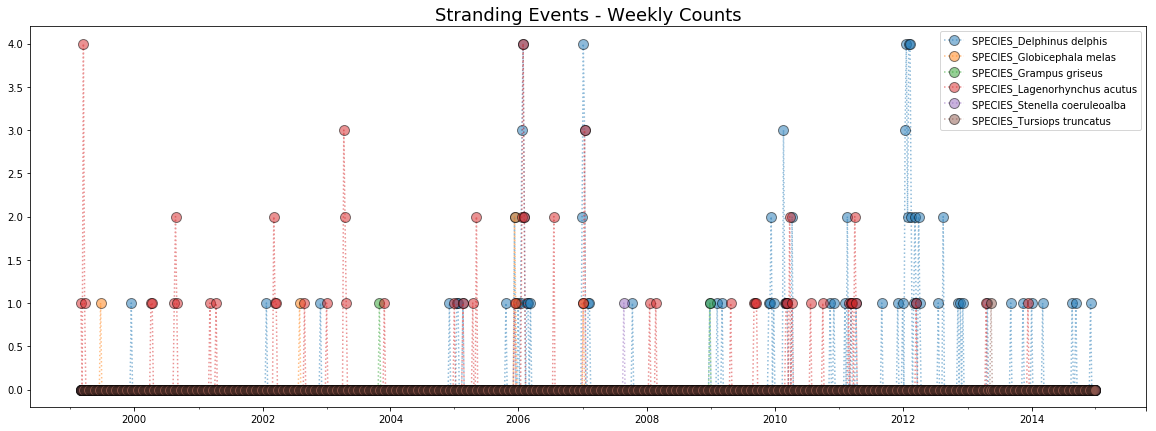

In [75]:
ax = dfspp_event_weekly.plot(figsize=(20,7), ls=':', marker='.', markersize=20, markeredgecolor='k', alpha=0.5)
ax.set_title('Stranding Events - Weekly Counts', fontsize=18)
ax.legend(loc=1);

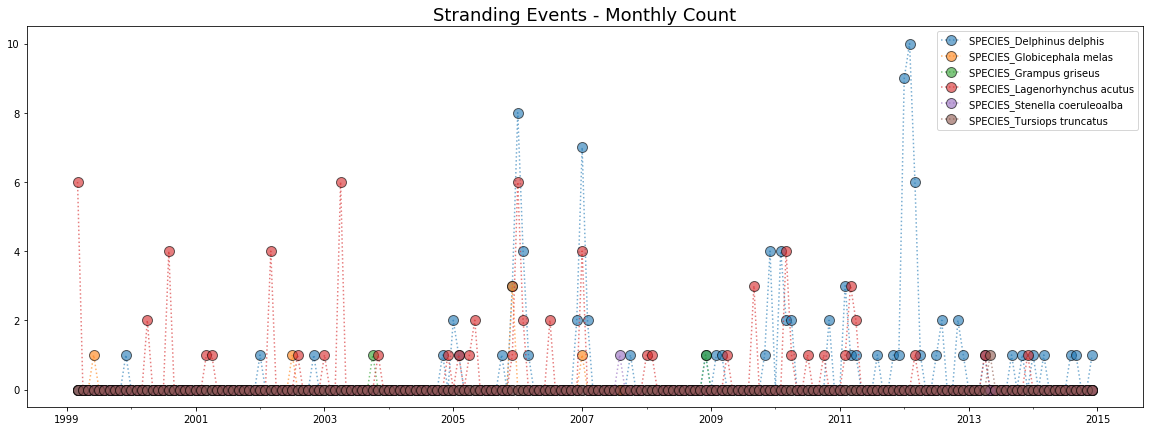

In [76]:
ax = dfspp_event_monthly.plot(figsize=(20,7), ls=':', marker='.', markersize=20, markeredgecolor='k', alpha=0.6)
ax.set_title('Stranding Events - Monthly Count', fontsize=18)
ax.legend(loc=1);

In [77]:
dataDict['Targets']['By_SPP'] = {'by_spp': dfspp,
                                'by_spp_event': dfspp_event,
                                'by_spp_event_wkly': dfspp_event_weekly,
                                'by_spp_event_mthly': dfspp_event_monthly}


In [78]:
with open(dataDir / 'CapeCodDataDict.pkl', 'wb') as f:
    pickle.dump(dataDict, f)